In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/content/Creditcard_data.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [262]:
data.shape

(772, 31)

In [263]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [264]:
data.duplicated().sum()

7

In [265]:
data=data.drop_duplicates(keep='first')

In [266]:
from sklearn.preprocessing import normalize
amt = normalize([data['Amount']])[0]
data['Amount'] = amt
data.drop(['Time'],axis=1,inplace=True)

In [267]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000463,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036,0


In [268]:
data['Class'].value_counts()

0    756
1      9
Name: Class, dtype: int64

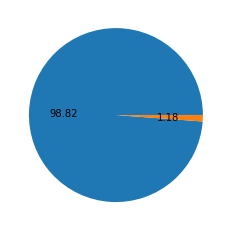

In [269]:
plt.pie(data['Class'].value_counts(),autopct="%0.2f")
plt.show()

In [270]:
#As we can see that the dataset is highly imbalanced we have to balance the datset

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = data.drop('Class', axis=1)
Y= data['Class']

osampler = RandomOverSampler()
usampler = RandomUnderSampler()

X_over, Y_over = osampler.fit_resample(X, Y)
X_res, Y_res = usampler.fit_resample(X_over, Y_over)

print("Number of samples in each class after resampling:")
print(Y_res.value_counts())

Number of samples in each class after resampling:
0    756
1    756
Name: Class, dtype: int64


In [271]:
X_res.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0.000631


In [272]:
df = pd.concat([X_res, Y_res], axis=1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036,0
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0.000631,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
1508,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,-0.142617,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.000170,1
1509,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.090968,1
1510,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,-0.282617,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,0.000463,1


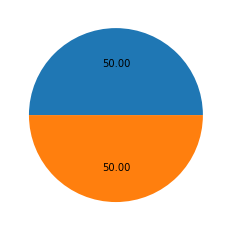

In [273]:
#checking the dataset now we can see that it is balanced
plt.pie(df['Class'].value_counts(),autopct="%0.2f")
plt.show()

In [274]:
# stratified sampling
from sklearn.model_selection import train_test_split
n = int((1.96*1.96 * 0.5*0.5)/((0.05)**2))
st = df.groupby('Class')
stdf = st.apply(lambda x: x.sample(n))
stdf

V1        V2        V3        V4        V5        V6  \
Class                                                                    
0     455   1.021665  0.110575  0.449480  1.041424 -0.213919 -0.230679   
      392  -0.487234  0.505825  0.880670  0.972986  0.823367  0.287738   
      140  -5.285971  4.847323 -1.290368 -1.427842 -0.621533 -0.604691   
      145   1.057021 -0.646956  0.729167 -0.569262 -1.174307 -0.527625   
      13   -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
...              ...       ...       ...       ...       ...       ...   
1     1477 -1.738582  0.052740  1.187057 -0.656652  0.920623 -0.291788   
      1261  1.254914  0.350287  0.302488  0.693114 -0.371470 -1.070256   
      1070 -2.000567 -2.495484  2.467149  1.140053  2.462010  0.594262   
      1356 -0.928088  0.398194  1.741131  0.182673  0.966387 -0.901004   
      1467  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   

                  V7        V8        V9       V10  ...       V21       V22  \
Class                                               ...                       
0     455   0.102706  0.038497 -0.319166  0.076003  ... -0.043694 -0.234765   
      392   0.725039  0.021040 -0.268138 -0.367036  ... -0.052209 -0.129567   
      140   0.437866  0.336384  3.558373  6.427802  ... -0.923604 -1.171187   
      145  -0.471677  0.051744  1.904018 -1.176609  ...  0.186184  0.743093   
      13   -0.422911 -1.907107  0.755713  1.151087  ...  1.151663  0.222182   
...              ...       ...       ...       ...  ...       ...       ...   
1     1477  0.269083  0.140631  0.023464 -0.066407  ... -0.179545 -0.192036   
      1261  0.086781 -0.202836  0.035154 -0.282617  ... -0.287592 -0.832682   
      1070 -2.110183  0.788347  0.958809 -0.328631  ...  0.422452  1.195394   
      1356  0.879016 -0.156590 -0.142117 -0.574775  ...  0.066353  0.281378   
      1467 -0.078803  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672   

                 V23       V24       V25       V26       V27       V28  \
Class                                                                    
0     455   0.032891  0.198345  0.330584 -0.559349  0.022828  0.025342   
      392  -0.177153 -1.004116  0.169317 -0.234252  0.129244  0.139251   
      140   0.150872 -0.493322  1.050554  0.194865  2.490503  1.575380   
      145  -0.163619  0.453570  0.615479 -0.508562  0.089553  0.037617   
      13    1.020586  0.028317 -0.232746 -0.235557 -0.164778 -0.030154   
...              ...       ...       ...       ...       ...       ...   
1     1477 -0.261879 -0.237477 -0.335040  0.240323 -0.345129 -0.383563   
      1261  0.128083  0.339427  0.215944  0.094704 -0.023354  0.030892   
      1070  0.297836 -0.857105 -0.219322  0.861019 -0.124622 -0.171060   
      1356 -0.257966  0.385384  0.391117 -0.453853 -0.104448 -0.125765   
      1467  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   

              Amount  Class  
Class                        
0     455   0.010770      0  
      392   0.011583      0  
      140   0.001539      0  
      145   0.011865      0  
      13    0.010111      0  
...              ...    ...  
1     1477  0.000172      1  
      1261  0.000463      1  
      1070  0.000258      1  
      1356  0.000172      1  
      1467  0.000463      1  

[768 rows x 30 columns]

In [275]:
# simple random sampling
n = int((1.96*1.96 * 0.5*0.5)/((0.05)**2))
sampledf = df.sample(n=n, random_state=42)
sampledf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
907,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,-0.282617,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,0.000463,1
617,-0.987477,1.118177,0.666258,-0.583883,-0.649628,0.815711,-1.045734,-3.792776,0.336438,-0.272903,...,3.614029,-1.840569,0.144464,-0.025964,0.660623,0.432567,0.298827,0.189823,0.013585,0
1386,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,0.090968,1
941,1.257719,0.364739,0.306923,0.690638,-0.357792,-1.067481,0.094272,-0.210300,0.014455,-0.286012,...,-0.286856,-0.820658,0.127663,0.343128,0.221120,0.094391,-0.022189,0.030944,0.000222,1
303,-0.608831,0.876837,2.495715,3.138674,0.161264,-0.107099,0.515854,-0.138226,-1.035070,0.851909,...,-0.262866,-0.439237,-0.006775,0.717471,0.199742,0.072401,0.099756,-0.136524,0.006038,0


In [276]:
# systematic sampling
i = 2
sysdf = df.iloc[::i]
sysdf

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0.000631,0
6,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.007016,0
8,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0.000633,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,1.254914,0.350287,0.302488,0.693114,-0.371470,-1.070256,0.086781,-0.202836,0.035154,-0.282617,...,-0.287592,-0.832682,0.128083,0.339427,0.215944,0.094704,-0.023354,0.030892,0.000463,1
1504,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
1506,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.000000,1
1508,0.073497,0.551033,0.451890,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,-0.142617,...,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.000170,1


In [277]:
# convenience sampling
convsample = pd.concat([df.head(380), df.tail(380)])
convsample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.021237,0
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.012036,0
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0.000631,0


In [278]:
# cluster sampling
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42).fit(df)
clusterassign = kmeans.labels_
sclusters = [0, 1, 4, 5, 8]
clusterseries = pd.Series(clusterassign)
dfclustersample = df[clusterseries.isin(sclusters)]
dfclustersample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.025729,0
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.065115,0
5,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0.000858,0
7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.016027,0
9,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,1.626659,...,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,0.001341,0


In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = [SVC(),LogisticRegression(),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),XGBClassifier(random_state=42)]
combinedsampledf=[stdf,sampledf,sysdf,convsample,dfclustersample]
results = []
for model in models:
    model_results = []
    for x in combinedsampledf:
      X = x.drop('Class', axis=1)
      y = x['Class']
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
      model.fit(X_train,y_train)
      score = model.score(X_test,y_test)
      model_results.append(score)
    results.append(model_results)

In [280]:
columns = ["Stratified Sampling", "Simple Random Sampling", "Systematic Sampling", "Convenience Sampling", "Cluster Sampling"]
index = ["Support Vector Machine(SVM)", "Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "XG Boost Classifier"]
results_df = pd.DataFrame(results, index=index, columns=columns)

In [281]:
results_df.head()

,Stratified Sampling,Simple Random Sampling,Systematic Sampling,Convenience Sampling,Cluster Sampling
Support Vector Machine(SVM),0.980519,0.935065,0.980263,0.967105,0.969388
Logistic Regression,0.935065,0.896104,0.934211,0.960526,0.928571
Decision Tree Classifier,0.974026,0.987013,0.993421,0.973684,1.000000
Random Forest Classifier,1.000000,0.987013,0.993421,1.000000,1.000000
XG Boost Classifier,0.993506,0.987013,0.986842,0.993421,1.000000
